## Summary statistics of dataset

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#I first called in my processed csv file 
df = pd.read_csv('mariokart_proc.csv', sep=',') 

#Then split the columns into separate lists
old = df['n_bids_old'].tolist()
new = df['n_bids_new'].tolist()
del new[-25:]      #I had to delete the last 25 elements 
                   #from the 'new' list because it was nAn.

#These are the statistics for the old dataset
mean1 = np.mean(old)
median1 = np.median(old)
mode1 = stats.mode(old)
stdev1 = np.std(old)
rnge1 = np.max(old) - np.min(old)
print("Number of bids for old game summary statistics")
print('sample size: ', len(old))
print('median: ', median1)
print('mean: ',round(mean1,1))
print('mode: ',mode1)
print('standard deviation: ', round(stdev1,2))
print('range: ', rnge1)

print('\n')    #I added a line break to make the output look neater

#These are the statistics for the old dataset
mean2 = np.mean(new)
median2 = np.median(new)
mode2 = stats.mode(new)
stdev2 = np.std(new)
rnge2 = np.max(new) - np.min(new)
print("Number of bids for new game summary statistics")
print('sample size: ', len(new))
print('median: ', median2)
print('mean: ',round(mean2,1))
print('mode: ',mode2)
print('standard deviation: ', round(stdev2,2))
print('range: ', rnge2)

Number of bids for old game summary statistics
sample size:  84
median:  13.0
mean:  13.2
mode:  ModeResult(mode=array([14]), count=array([9]))
standard deviation:  5.46
range:  27


Number of bids for new game summary statistics
sample size:  59
median:  15.0
mean:  14.1
mode:  ModeResult(mode=array([16.]), count=array([6]))
standard deviation:  6.34
range:  28.0


# Distribution of both old and new

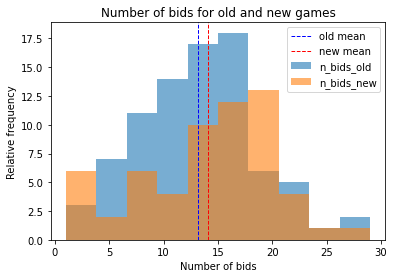

In [106]:
#this plots both of the samples together to see the difference more clearly

histogram = df.plot.hist(bins = 10, alpha = 0.6)
plt.title('Number of bids for old and new games')
plt.xlabel('Number of bids')
plt.ylabel('Relative frequency')
plt.axvline(df['n_bids_old'].mean(), color='blue', linestyle='dashed', linewidth=1, label = 'old mean')
plt.axvline(df['n_bids_new'].mean(), color='red', linestyle='dashed', linewidth=1, label = 'new mean')
plt.legend()

# Distribution of old games

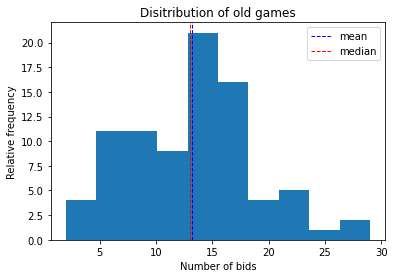

In [107]:

old_hist = df['n_bids_old'].plot.hist(bins = 10, label ='')
plt.title('Disitribution of old games')
plt.xlabel('Number of bids')
plt.ylabel('Relative frequency')

#these lines denote the mean and median of the sample
plt.axvline(df['n_bids_old'].mean(), color='blue', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(df['n_bids_old'].median(), color='red', linestyle='dashed', linewidth=1, label = 'median')
plt.legend()


# Distribution of new games

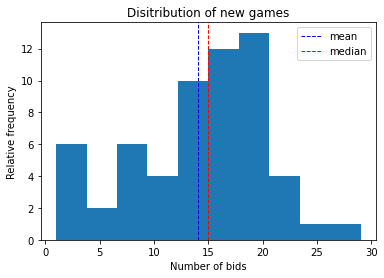

In [108]:

new_hist = df['n_bids_new'].plot.hist(bins = 10, label ='')

plt.title('Disitribution of new games')
plt.xlabel('Number of bids')
plt.ylabel('Relative frequency')

#these lines denote the mean and median of the sample
plt.axvline(df['n_bids_new'].mean(), color='blue', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(df['n_bids_new'].median(), color='red', linestyle='dashed', linewidth=1, label = 'median')
plt.legend()


# Difference of Means test

In [166]:
#getting difference of means hypothesis test

def dif_means(data1,data2,tails):
    n1 = len(data1)
    n2 = len(data2)
    
    #I use numpy to get the means and standard deviation
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    
    s1 = np.std(data1)
    s2 = np.std(data2)
    
    SE = np.sqrt(((s1**2)/n1) + ((s2**2)/n2))
    
    tscore = np.abs((x2 - x1))/SE
    
    #this if loop checks for which sample size is smaller
    if n1 < n2:
        degfree = n1 - 1
    else:
        degfree = n2 - 1
        
    p = tails*stats.t.cdf(-t, degfree)
    
    #to make t test more accurate, we use pooled sd
    
    a = (s1**2) * (n1 - 1)
    b = (s2**2) * (n2 - 2)
    c = n1 + n2 - 2
    sd_pooled = np.sqrt((a + b) / c)
    
    #This can then be used to find our Cohen's d
    
    cohens_d = (x2 - x1)/sd_pooled
    
    print('t score = ', t)
    print('p value = ', p)
    print('cohens d  = ', cohens_d)
    
    
print(dif_means(old, new, 2))


t score =  0.9457876847373693
p value =  0.3481805590479937
cohens d  =  0.15494470046149397
None


# Calculating confidence interval

In [238]:
#we use the smaller sample size for degree of freedom
if len(old) < len(new):
    degfree = len(old) - 1
else:
    degfree = len(new) - 1
    
#the critical t value is calclated from scipy    
crit_t = (scipy.stats.t.ppf(1-(1-0.95/2),degfree))
#We need to do 1-(1-a/2) because we are trying to get the left side
#of the normal distribution curve. The divide by 2 is because it is
#two tailed.

posconf = (mean2 - mean1) + (crit_t*SE)
negconf = (mean2 - mean1) - (crit_t*SE)

print(round(posconf,3))
print(round(negconf,3))

0.867
0.935
